---
title: AutoRegressive (AR) Models
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

We will fit AutoRegressive Models to some time series datasets, and obtain predictions for future values of the time series. 

## Dataset One: Liquor Sales Data from FRED

  observation_date  MRTSSM4453USN
0       1992-01-01           1414
1       1992-02-01           1444
2       1992-03-01           1496
3       1992-04-01           1569
4       1992-05-01           1707


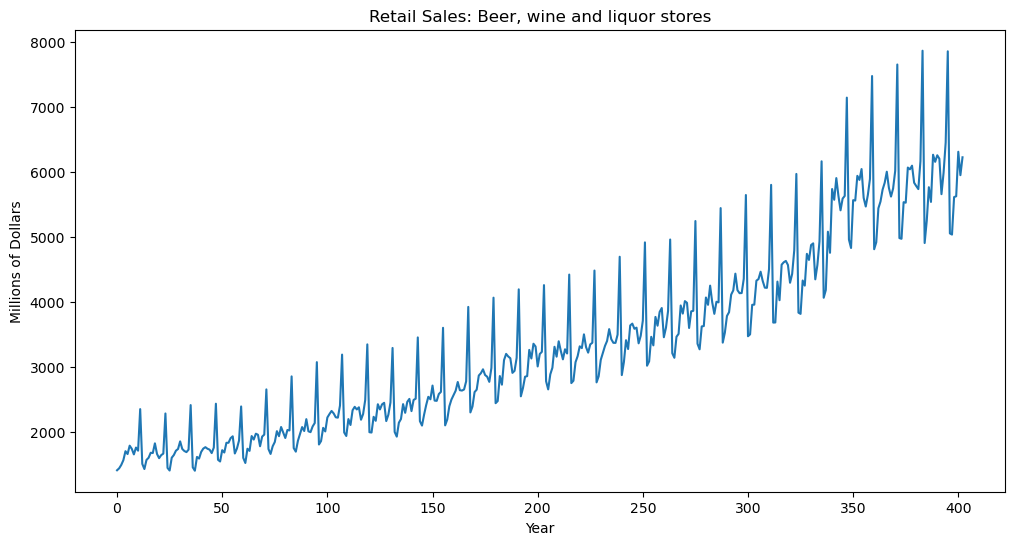

In [206]:
#The following is FRED data on retail sales (in millions of dollars) for beer, wine and liquor stores (https://fred.stlouisfed.org/series/MRTSSM4453USN)
beersales = pd.read_csv('MRTSSM4453USN_October2025.csv')
print(beersales.head())
y = beersales['MRTSSM4453USN'].to_numpy()
plt.figure(figsize = (12, 6))
plt.plot(y)
plt.xlabel('Year')
plt.ylabel('Millions of Dollars')
plt.title('Retail Sales: Beer, wine and liquor stores')
plt.show()

AutoRegressive (AR) models are a simple way for obtaining forecasts (predictions) for future values of the time series. 

In [255]:
p = 12 #this is the order of the AR model
n = len(y)
print(n)
print(y)

403
[1414 1444 1496 1569 1707 1663 1792 1744 1658 1763 1715 2354 1512 1433
 1573 1606 1683 1679 1828 1665 1600 1647 1670 2287 1450 1410 1607 1648
 1715 1741 1858 1742 1710 1693 1731 2416 1459 1407 1619 1594 1696 1747
 1769 1745 1731 1678 1762 2437 1575 1549 1723 1687 1836 1837 1908 1936
 1672 1748 1871 2395 1605 1526 1745 1712 1940 1886 1976 1960 1783 1932
 1962 2657 1740 1665 1783 1848 2015 1938 2079 1993 1910 2033 2026 2857
 1755 1700 1867 1974 2078 2017 2200 2013 2000 2088 2140 3076 1810 1863
 2066 2011 2225 2278 2326 2288 2228 2223 2409 3192 1995 1941 2201 2110
 2337 2389 2349 2382 2191 2279 2495 3349 1999 1994 2236 2174 2429 2349
 2427 2451 2170 2267 2456 3294 2003 1931 2145 2202 2431 2297 2466 2511
 2323 2495 2514 3456 2169 2101 2270 2418 2543 2505 2716 2485 2481 2586
 2619 3604 2104 2194 2398 2501 2568 2637 2771 2645 2639 2656 2782 3925
 2303 2394 2616 2653 2870 2906 2966 2878 2852 2773 2987 4067 2445 2478
 2862 2730 3107 3203 3163 3136 2911 2942 3142 4195 2551 2677 2852 2861
 3

AR models work just like regression. The response vector and design matrix in the regression are set up as follows. 

In [256]:
yreg = y[p:] #these are the response values in the autoregression
Xmat = np.ones((n-p, 1)) #this will be the design matrix (X) in the autoregression
for j in range(1, p+1):
    col = y[p-j : n-j]
    Xmat = np.column_stack([Xmat, col])
print(Xmat.shape)
print(Xmat)

(391, 13)
[[1.000e+00 2.354e+03 1.715e+03 ... 1.496e+03 1.444e+03 1.414e+03]
 [1.000e+00 1.512e+03 2.354e+03 ... 1.569e+03 1.496e+03 1.444e+03]
 [1.000e+00 1.433e+03 1.512e+03 ... 1.707e+03 1.569e+03 1.496e+03]
 ...
 [1.000e+00 5.626e+03 5.613e+03 ... 6.256e+03 6.155e+03 6.264e+03]
 [1.000e+00 6.310e+03 5.626e+03 ... 6.203e+03 6.256e+03 6.155e+03]
 [1.000e+00 5.950e+03 6.310e+03 ... 5.658e+03 6.203e+03 6.256e+03]]


In [257]:
armod = sm.OLS(yreg, Xmat).fit()
print(armod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2597.
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:14:31   Log-Likelihood:                -2529.9
No. Observations:                 391   AIC:                             5086.
Df Residuals:                     378   BIC:                             5137.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7819     21.711      0.312      0.7

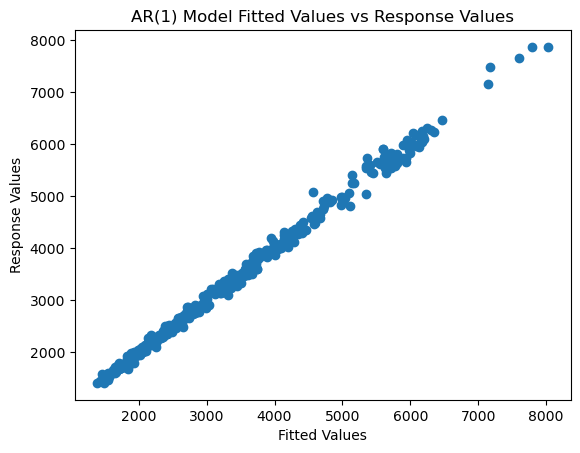

In [252]:
arfitted = armod.fittedvalues
#Plotting the fitted values against response values
plt.xlabel('Fitted Values')
plt.ylabel('Response Values')
plt.title('AR(1) Model Fitted Values vs Response Values')
plt.plot(arfitted, yreg, 'o')
plt.show()

In [253]:
#Generate k-step ahead forecasts: 
k = 100
yhat = np.concatenate([y, np.full(k, -9999)]) #extend data by k placeholder values
for i in range(1, k+1):
    ans = armod.params[0]
    for j in range(1, p+1):
        ans += armod.params[j] * yhat[n+i-j-1]
    yhat[n+i-1] = ans
predvalues = yhat[n:]

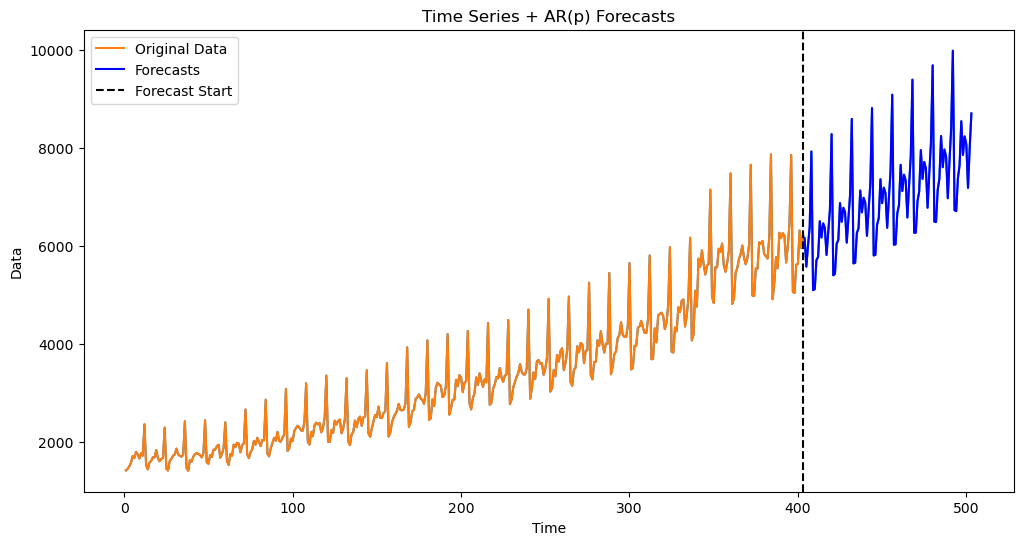

In [254]:
#Plotting the series with forecasts: 
plt.figure(figsize=(12, 6))
time_all = np.arange(1, n + k + 1)
plt.plot(time_all, yhat,  color='C0')
plt.plot(range(1, n + 1), y, label='Original Data', color='C1')
plt.plot(range(n + 1, n + k + 1), predvalues, label='Forecasts', color='blue')
plt.axvline(x=n, color='black', linestyle='--', label='Forecast Start')
#plt.axhline(y=np.mean(y), color='gray', linestyle=':', label='Mean of Original Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Time Series + AR(p) Forecasts')
plt.legend()
plt.show()

The predictions depend crucially on the order $p$ of the model. If $p \geq 12$, we get reasonable predictions. However for smaller values of $p$, the predictions look very unnatural. Go back and repeat the code above for other values of $p$. 

## Dataset Two: House Price Data from FRED

  observation_date  ASPUS
0       1963-01-01  19300
1       1963-04-01  19400
2       1963-07-01  19200
3       1963-10-01  19600
4       1964-01-01  19600


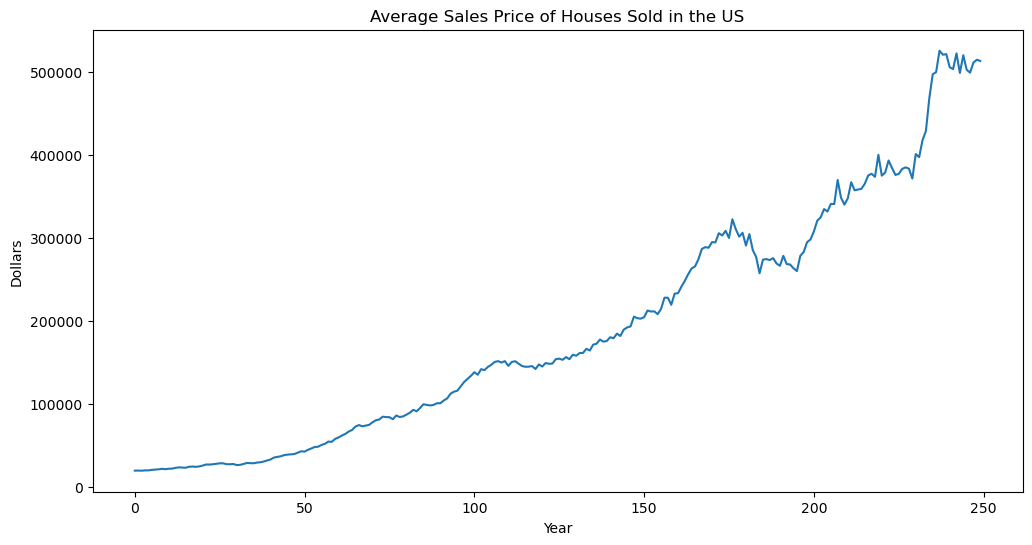

In [258]:
#The following is FRED data on Average Sales Price of Houses Sold for the US (https://fred.stlouisfed.org/series/ASPUS)
hprice = pd.read_csv('ASPUS_October2025.csv')
print(hprice.head())
y = hprice['ASPUS'].to_numpy()
plt.figure(figsize = (12, 6))
plt.plot(y)
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.title('Average Sales Price of Houses Sold in the US')
plt.show()

In [285]:
p = 30 #this is the order of the AR model
n = len(y)
print(n)

250


In [286]:
yreg = y[p:] #these are the response values in the autoregression
Xmat = np.ones((n-p, 1)) #this will be the design matrix (X) in the autoregression
for j in range(1, p+1):
    col = y[p-j : n-j].reshape(-1, 1)
    Xmat = np.column_stack([Xmat, col])
print(Xmat.shape)
print(y)

(220, 31)
[ 19300  19400  19200  19600  19600  20200  20500  20900  21500  21000
  21600  21700  22700  23200  23000  22800  24000  24200  23900  24400
  25400  26700  26600  27000  27600  28100  28100  27100  27000  27300
  26000  26300  27300  28600  28300  28200  29000  29400  30300  31600
  32800  35100  35900  36600  38000  38600  39000  39300  40900  42600
  42200  44400  46000  47800  48100  50300  51600  54300  54000  57500
  59300  61600  63500  66400  68300  72400  74200  72700  73600  74400
  77500  80000  80900  84300  83800  83700  81200  85700  83900  84600
  86700  89100  92500  90800  94700  99200  98500  97800  98500 100500
 100500 103800 106300 112000 114400 115600 120800 126100 129900 133500
 137900 134800 141500 140400 144300 146800 150200 151200 149500 151200
 145500 150100 151100 148200 145400 144400 144500 145300 141700 147200
 144700 148900 148000 148300 153600 154200 152800 156100 153500 158900
 157700 160900 161100 166000 164000 171000 172200 177200 174700 175

In [287]:
armod = sm.OLS(yreg, Xmat).fit()
print(armod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2885.
Date:                Thu, 23 Oct 2025   Prob (F-statistic):          4.29e-235
Time:                        16:22:56   Log-Likelihood:                -2239.4
No. Observations:                 220   AIC:                             4541.
Df Residuals:                     189   BIC:                             4646.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1252.3043    895.312      1.399      0.1

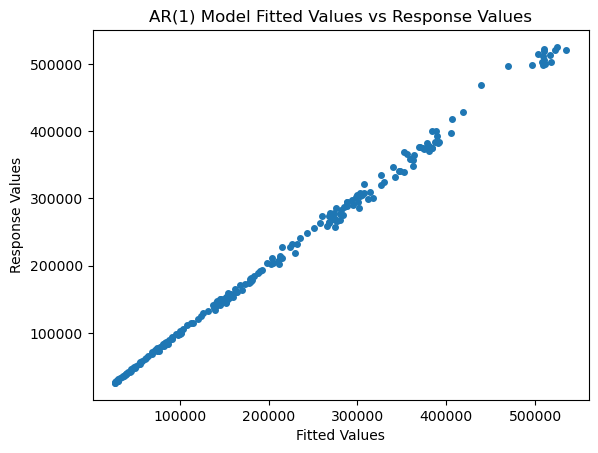

In [288]:
arfitted = armod.fittedvalues
#Plotting the fitted values against response values
plt.xlabel('Fitted Values')
plt.ylabel('Response Values')
plt.title('AR(1) Model Fitted Values vs Response Values')
#plotting with reduced size points for better visibility    
plt.plot(arfitted, yreg, 'o', markersize=4)  

plt.show()

In [289]:
#Generate k-step ahead forecasts: 
k = 100
yhat = np.concatenate([y, np.full(k, -9999)]) #extend data by k placeholder values
for i in range(1, k+1):
    ans = armod.params[0]
    for j in range(1, p+1):
        ans += armod.params[j] * yhat[n+i-j-1]
    yhat[n+i-1] = ans
predvalues = yhat[n:]

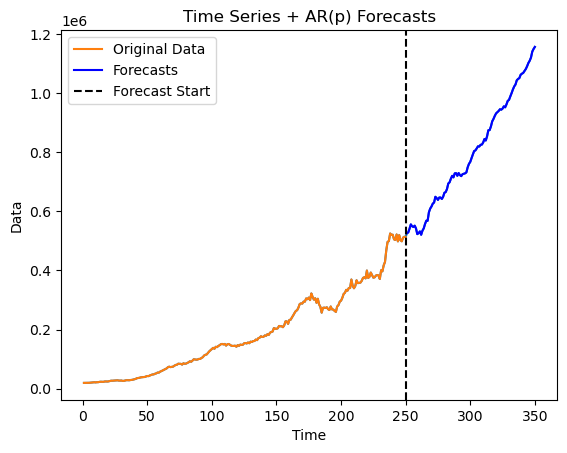

In [290]:
#Plotting the series with forecasts: 
time_all = np.arange(1, n + k + 1)
plt.plot(time_all, yhat, color='C0')
plt.plot(range(1, n + 1), y, label='Original Data', color='C1')
plt.plot(range(n + 1, n + k + 1), predvalues, label='Forecasts', color='blue')
plt.axvline(x=n, color='black', linestyle='--', label='Forecast Start')
#plt.axhline(y=np.mean(y), color='gray', linestyle=':', label='Mean of Original Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Time Series + AR(p) Forecasts')
plt.legend()
plt.show()

Repeat the above code for different values of $p$ to see how the predictions change. 

We will now apply AR models to logarithms of $y$. 

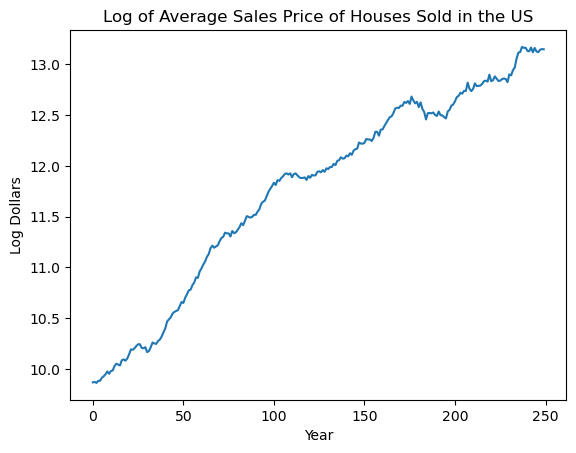

In [291]:
ylog = np.log(y)
plt.plot(ylog)
plt.xlabel('Year')
plt.ylabel('Log Dollars')
plt.title('Log of Average Sales Price of Houses Sold in the US')
plt.show()

In [292]:
p = 30 #this is the order of the AR model
n = len(ylog)
print(n)

250


In [293]:
yreg = ylog[p:] #these are the response values in the autoregression
Xmat = np.ones((n-p, 1)) #this will be the design matrix (X) in the autoregression
for j in range(1, p+1):
    col = ylog[p-j : n-j].reshape(-1, 1)
    Xmat = np.column_stack([Xmat, col])

In [294]:
armod_log = sm.OLS(yreg, Xmat).fit()
print(armod_log.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7003.
Date:                Thu, 23 Oct 2025   Prob (F-statistic):          1.96e-271
Time:                        16:22:59   Log-Likelihood:                 509.83
No. Observations:                 220   AIC:                            -957.7
Df Residuals:                     189   BIC:                            -852.5
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1013      0.033      3.049      0.0

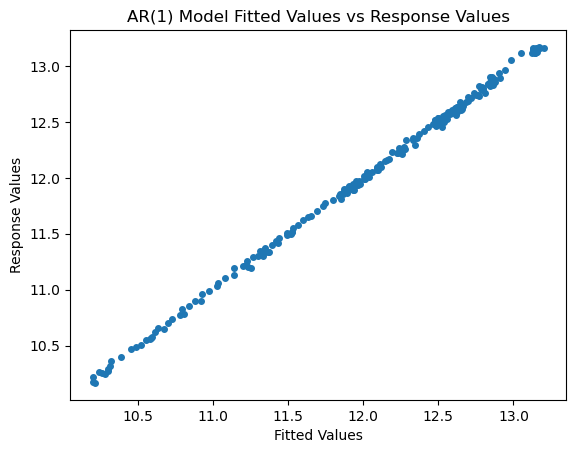

In [295]:
arfitted_log = armod_log.fittedvalues
#Plotting the fitted values against response values
plt.xlabel('Fitted Values')
plt.ylabel('Response Values')
plt.title('AR(1) Model Fitted Values vs Response Values')
#plotting with reduced size points for better visibility    
plt.plot(arfitted_log, yreg, 'o', markersize=4)  

plt.show()

In [296]:
#Generate k-step ahead forecasts: 
k = 100
yhat = np.concatenate([ylog, np.full(k, -9999)]) #extend data by k placeholder values
for i in range(1, k+1):
    ans = armod_log.params[0]
    for j in range(1, p+1):
        ans += armod_log.params[j] * yhat[n+i-j-1]
    yhat[n+i-1] = ans
predvalues_log = yhat[n:]

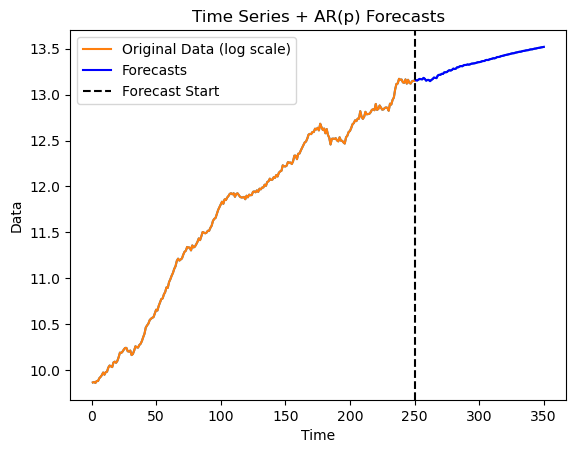

In [297]:
#Plotting the series with forecasts: 
time_all = np.arange(1, n + k + 1)
plt.plot(time_all, yhat, color='C0')
plt.plot(range(1, n + 1), ylog, label='Original Data (log scale)', color='C1')
plt.plot(range(n + 1, n + k + 1), predvalues_log, label='Forecasts', color='blue')
plt.axvline(x=n, color='black', linestyle='--', label='Forecast Start')
#plt.axhline(y=np.mean(y), color='gray', linestyle=':', label='Mean of Original Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Time Series + AR(p) Forecasts')
plt.legend()
plt.show()

We now plot the predictions on the original data. 

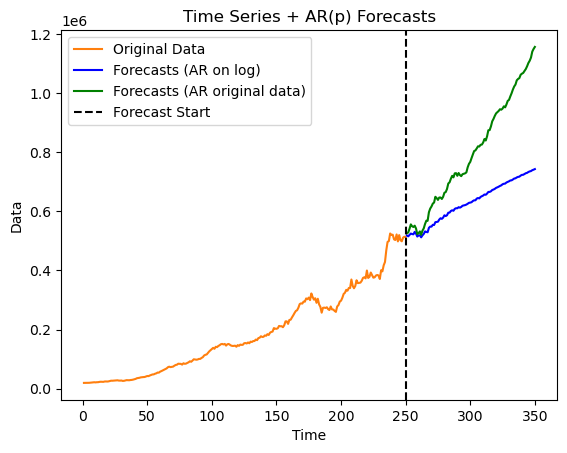

In [298]:
#Plotting the series with forecasts: 
time_all = np.arange(1, n + k + 1)
plt.plot(range(1, n + 1), y, label='Original Data', color='C1')
plt.plot(range(n + 1, n + k + 1), np.exp(predvalues_log), label='Forecasts (AR on log)', color='blue')
plt.plot(range(n + 1, n + k + 1), predvalues, label='Forecasts (AR original data)', color='green')
plt.axvline(x=n, color='black', linestyle='--', label='Forecast Start')
#plt.axhline(y=np.mean(y), color='gray', linestyle=':', label='Mean of Original Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Time Series + AR(p) Forecasts')
plt.legend()
plt.show()

## Sunspots Data

Autoregressive models were invented in the context of the sunspots data by Yule in 1927.

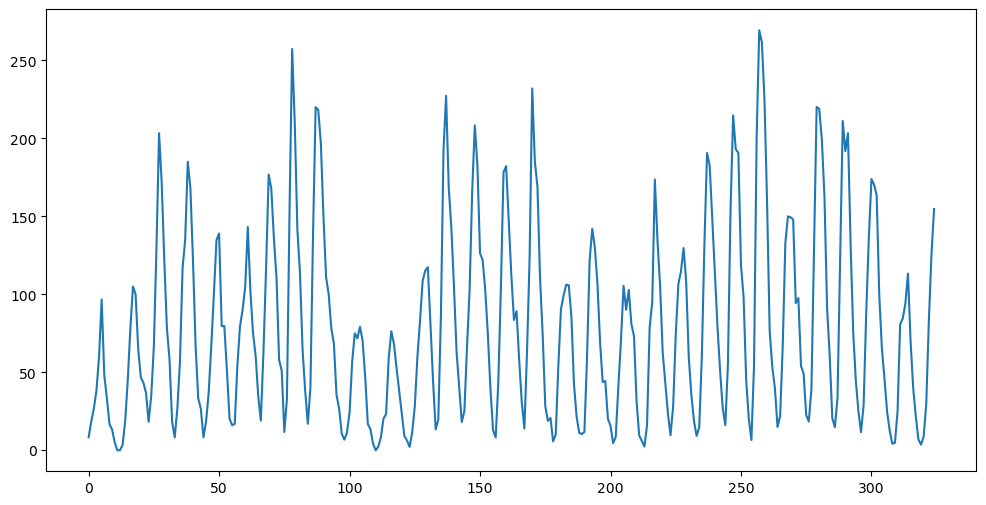

In [299]:
sunspots = pd.read_csv('SN_y_tot_V2.0.csv', header = None, sep = ';')
y = sunspots.iloc[:,1].values
n = len(y)
plt.figure(figsize = (12, 6))
plt.plot(y)
plt.show()

The most basic model for this dataset is the single sinusoid model: 
\begin{equation*}
    y_t = \beta_0 + \beta_1 \cos(2 \pi f t) + \beta_2 \sin(2 \pi f t) + \epsilon_t
\end{equation*} 
with $\epsilon_t \overset{\text{i.i.d}}{\sim} N(0, \sigma^2)$. We previously used this model. For estimating $f$, we calculate $RSS(f)$ for a bunch of $f$ values, and then minimize it over $f$. 

In [300]:
#rss function:
def rss(f):
    n = len(y)
    X = np.column_stack([np.ones(n)])
    x = np.arange(1, n+1)
    xcos = np.cos(2 * np.pi * f * x)
    xsin = np.sin(2 * np.pi * f * x)
    X = np.column_stack([X, xcos, xsin])
    md = sm.OLS(y, X).fit()
    ans = np.sum(md.resid ** 2)
    return ans

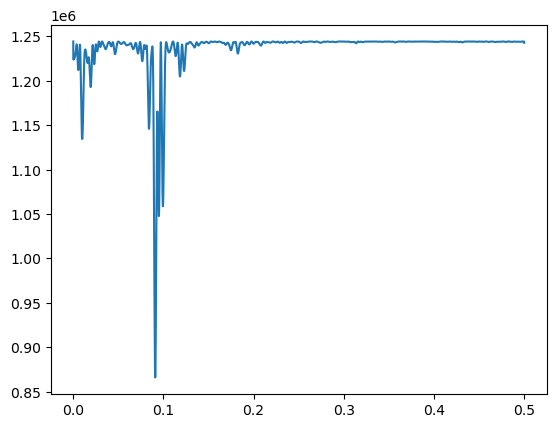

In [301]:
ngrid = 10000
fvals = np.linspace(0, 0.5, ngrid)
rssvals = np.array([rss(f) for f in fvals])
plt.plot(fvals, rssvals) #plot rss and find f which minimizes rss
plt.show()

In [302]:
fhat = fvals[np.argmin(rssvals)]
print(fhat) 
print(1/fhat)  #period corresponding to fhat

0.09090909090909091
11.0


The MLE of $f$ is basically $1/11$ (corresponding to the 11-year solar cycle). After estimating $f$, the other parameters $\beta_0, \beta_1, \beta_2, \sigma$ are estimated as in usual linear regression as follows. 

In [303]:
#Estimates of beta and sigma: 
x = np.arange(1, n+1)
f = fhat
xcos = np.cos(2 * np.pi * f * x)
xsin = np.sin(2 * np.pi * f * x)
X = np.column_stack([np.ones(n), xcos, xsin])
md = sm.OLS(y, X).fit()
print(md.params) #this gives estimates of beta_0, beta_1, beta_2 
rss_fhat = np.sum(md.resid ** 2)
#there are two estimates for sigma (which usually give similar values)
sigma_mle = np.sqrt(rss_fhat/n)
sigma_unbiased = np.sqrt((rss_fhat)/(n-3))
print(np.array([sigma_mle, sigma_unbiased])) 

[ 78.87599158 -38.28231622 -29.2786631 ]
[51.62376442 51.86369026]


Yule did not like the simple single sinusoidal model for the sunspots data, mainly because if we simulate data from it, the data will look much more noisy and irregular as opposed to the sunspots data which have a smooth appearance. We can check this by simulating synthetic data from the single sinusoid model and comparing the synthetic data with the actual sunspots data. We will take the parameters $f, \beta, \sigma$ to be those estimated from the sunspots dataset to make the plots  comparable to the actual sunspots data. 

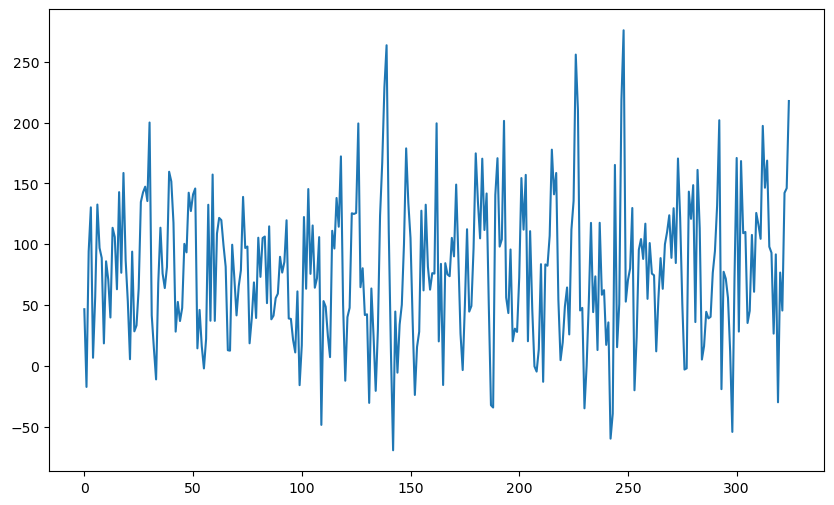

In [304]:
rng = np.random.default_rng(seed = 42)
errorsamples = rng.normal(loc = 0, scale = sigma_mle, size = n)
sim_data = md.fittedvalues + errorsamples
plt.figure(figsize = (10, 6))
plt.plot(sim_data)
plt.show()

To facilitate comparison with the actual sunspots dataset, let us plot a bunch of these simulated datasets along with the real sunspots data (just to see if the sunspots dataset can be spotted as the “odd one out” from these plots).

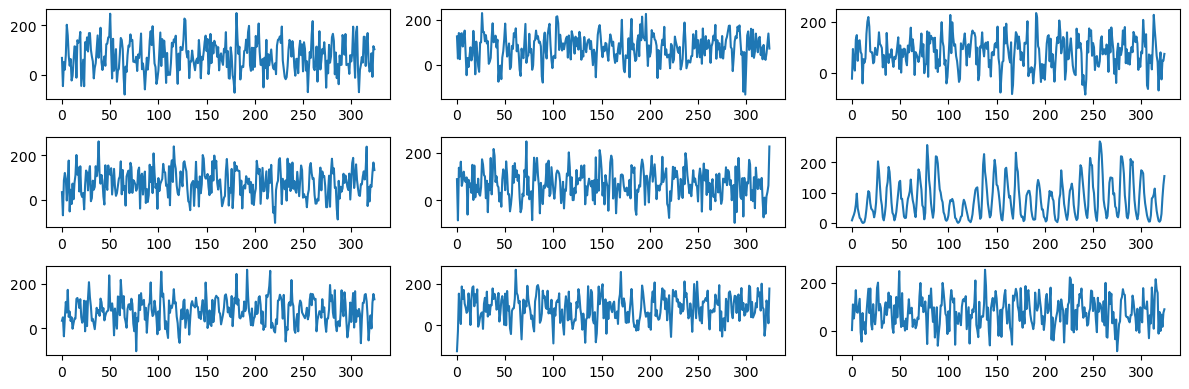

In [305]:
fig, axes = plt.subplots(3, 3, figsize = (12, 4))
axes = axes.flatten()
for i in range(5):
    errorsamples = rng.normal(loc = 0, scale = sigma_mle, size = n)
    sim_data = md.fittedvalues + errorsamples
    axes[i].plot(sim_data)
axes[5].plot(y)
for i, idx in enumerate(range(6, 9)):
    errorsamples = rng.normal(loc = 0, scale = sigma_mle, size = n)
    sim_data = md.fittedvalues + errorsamples
    axes[idx].plot(sim_data)
plt.tight_layout()
plt.show()

It is clear from the above plot-grid that the sunspots dataset sticks out as the odd one out. This shows that the simulated datasets (which are too wiggly and do not have well-defined peaks) are generated from a model that ignores many aspects of the sunspots dataset.

### Yule Model

Yule model is given by: 
\begin{equation*}
   y_t = \phi_0 + \phi_1 y_{t-1} - y_{t-2} + \epsilon_t
\end{equation*}
Note that $\phi_2$ in the usual AR(2) model is set to -1 above. Also $\phi_1$ is given by $2 \cos(2 \pi f)$. The above model can be rewritten as 
\begin{equation*}
  y_t + y_{t-2} = \phi_0 + \phi_1 y_{t-1} + \epsilon_t
\end{equation*}
so we can estimate $\phi_0$ and $\phi_1$ by regressing $y_t + y_{t-2}$ on $y_{t-1}$. 

In [306]:
p = 2
yreg = y[p:]
x1 = y[1:-1]
x2 = y[:-2]
Xmat = np.column_stack([np.ones(len(yreg)), x1])
print(Xmat.shape)

(323, 2)


In [307]:
y_adjusted = yreg + x2
yulemod = sm.OLS(y_adjusted, Xmat).fit()
print(yulemod.summary())
print(yulemod.params)
slpe_est = yulemod.params[1]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     4254.
Date:                Thu, 23 Oct 2025   Prob (F-statistic):          2.90e-187
Time:                        16:51:37   Log-Likelihood:                -1532.1
No. Observations:                 323   AIC:                             3068.
Df Residuals:                     321   BIC:                             3076.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.6834      2.511     11.421      0.0

From the estimate for $\phi_1$, the frequency parameter can be estimated using the relation: $\phi_1 = 2 \cos (2 \pi f)$. 

In [308]:
yulefhat = np.arccos(slpe_est/2) / (2 * np.pi)
print(1/yulefhat)

10.259176143439632


The period corresponding to this frequency is $10.259$ which is smaller than the period of 11 that we get by fitting $y_t = \beta_0 + \beta_1 \cos(2 \pi f t) + \beta_2 \sin(2 \pi f t) + \epsilon_t$. 

In [309]:
#Generate k-step ahead forecasts: 
k = 100
yhat = np.concatenate([y, np.full(k, -9999)]) #extend data by k placeholder values
for i in range(1, k+1):
    ans = yulemod.params[0] - yhat[n+i-3]
    ans += yulemod.params[1] * yhat[n+i-2]
    yhat[n+i-1] = ans
predvalues = yhat[n:]
print(predvalues)
print(yhat)

[ 1.56348277e+02  1.29845664e+02  8.48261433e+01  3.76547907e+01
  5.47889486e+00 -5.26328291e-03  2.31958661e+01  6.66484255e+01
  1.14556947e+02  1.49506172e+02  1.58791685e+02  1.39038104e+02
  9.74260659e+01  4.90819890e+01  1.15794607e+01 -1.44895065e+00
  1.47327213e+01  5.42422665e+01  1.02717544e+02  1.42537275e+02
  1.59226562e+02  1.46718673e+02  1.09560357e+02  6.12590590e+01
  1.93728148e+01 -8.72279635e-01  7.88308317e+00  4.24562356e+01
  9.02794685e+01  1.33968527e+02  1.57641974e+02  1.52694258e+02
  1.20923928e+02  7.38798357e+01  2.86630109e+01  1.71025067e+00
  2.81917042e+00  3.15866660e+01  7.75554463e+01  1.24015370e+02
  1.54077760e+02  1.56814618e+02  1.31231066e+02  8.66269979e+01
  3.92164679e+01  6.23370836e+00 -3.31696240e-01  2.19068486e+01
  6.48653949e+01  1.12928054e+02  1.48623536e+02  1.58976155e+02
  1.40222622e+02  9.91800471e+01  5.07678428e+01  1.25843613e+01
 -1.49029536e+00  1.36601606e+01  5.25283769e+01  1.00985343e+02
  1.41416436e+02  1.59124

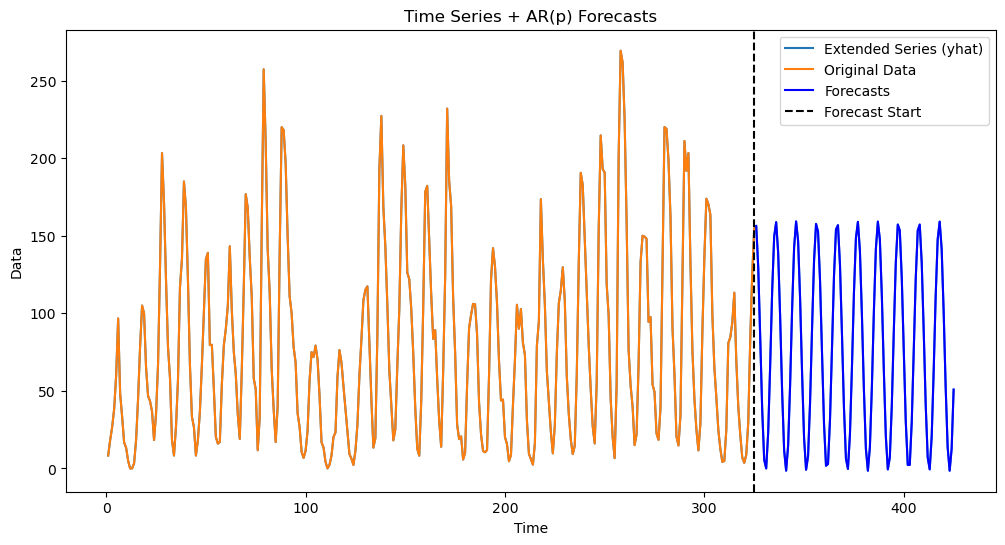

In [310]:
#Plotting the series with forecasts: 
plt.figure(figsize=(12, 6))
time_all = np.arange(1, n + k + 1)
plt.plot(time_all, yhat, label='Extended Series (yhat)', color='C0')
plt.plot(range(1, n + 1), y, label='Original Data', color='C1')
plt.plot(range(n + 1, n + k + 1), predvalues, label='Forecasts', color='blue')
plt.axvline(x=n, color='black', linestyle='--', label='Forecast Start')
#plt.axhline(y=np.mean(y), color='gray', linestyle=':', label='Mean of Original Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Time Series + AR(p) Forecasts')
plt.legend()
plt.show()

The predictions above are perfectly sinusoidal. Because the cycles for the sunspots data are irregular and can have different periods, there is a danger that these perfectly sinusoidal predictions can get out of phase sometimes leading to loss of prediction accuracy. 

Below, we simulate datasets using the Yule model. 

27.778317980024667


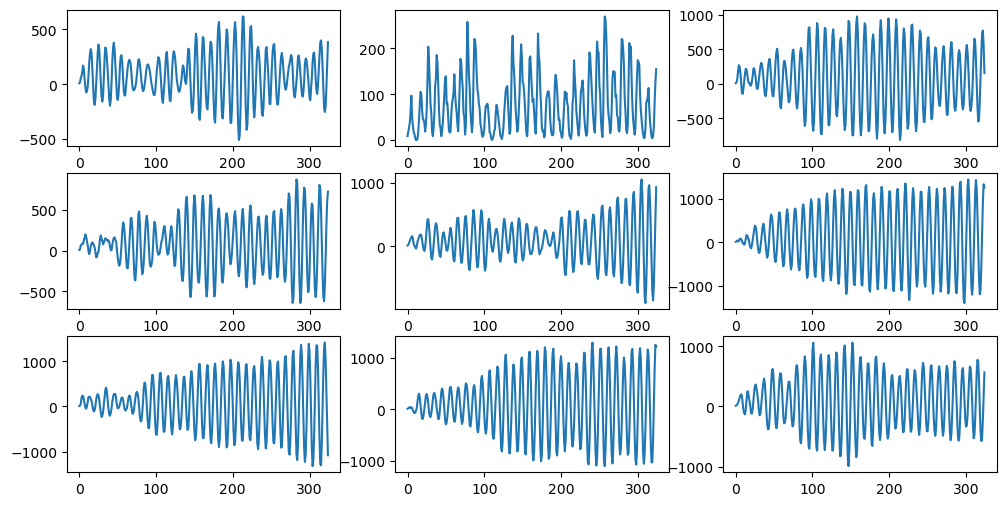

In [311]:
#Simulating from the Yule Model:
rng = np.random.default_rng(seed = 42)
sighat = np.sqrt(np.mean(yulemod.resid ** 2))
print(sighat)
fig, axes = plt.subplots(3, 3, figsize = (12, 6))
axes = axes.flatten()
for j in range(1):
    ysim = y.copy()
    for i in range(2, n):
        err = rng.normal(loc = 0, scale = sighat, size = 1)
        ysim[i] = yulemod.params[0] + yulemod.params[1] * ysim[i-1] - ysim[i-2] + err[0]
    axes[j].plot(ysim)
axes[1].plot(y)    
for j in range(2, 9):
    ysim = y.copy()
    for i in range(2, n):
        err = rng.normal(loc = 0, scale = sighat, size = 1)
        ysim[i] = yulemod.params[0] + yulemod.params[1] * ysim[i-1] - ysim[i-2] + err[0]
    axes[j].plot(ysim)
plt.show()

The sunspots dataset still probably sticks out compared to the synthetic datasets. However, all these synthetic datasets are quite smooth just like the actual sunspots data. This plots shows that the two "sinusoid + noise" models described in  lecture are fundamentally different.

## AR(2) Model

The Yule model is a special case of the AR(2) model. Specifically, the AR(2) model is: $y_t = \phi_0 + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \epsilon_t$ and the Yule model is a special case obtained by taking $\phi_2 = 1$. Below we fit the AR(2) model to the sunspots data (i.e., we estimate all the parameters $\phi_0, \phi_1, \phi_2$). 

In [312]:
p = 2 #this is the order of the AR model
n = len(y)
print(n)

325


In [313]:
yreg = y[p:] #these are the response values in the autoregression
Xmat = np.ones((n-p, 1)) #this will be the design matrix (X) in the autoregression
for j in range(1, p+1):
    col = y[p-j : n-j].reshape(-1, 1)
    Xmat = np.column_stack([Xmat, col])

In [314]:
armod = sm.OLS(yreg, Xmat).fit()
print(armod.params)
print(armod.summary())
sighat = np.sqrt(np.mean(armod.resid ** 2))
print(sighat)

[24.45610705  1.38803272 -0.69646032]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     774.7
Date:                Thu, 23 Oct 2025   Prob (F-statistic):          2.25e-123
Time:                        16:56:04   Log-Likelihood:                -1505.5
No. Observations:                 323   AIC:                             3017.
Df Residuals:                     320   BIC:                             3028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

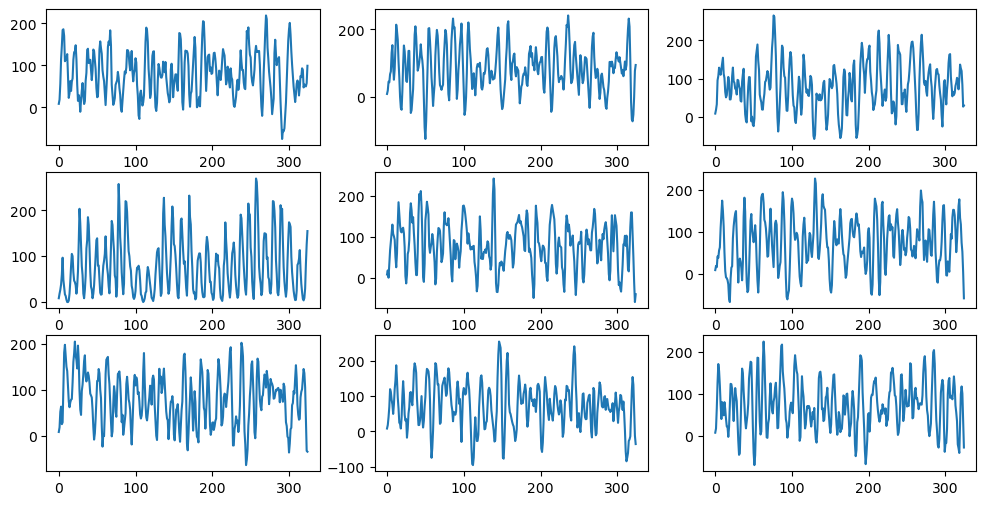

In [315]:
#Simulations from the fitted AR(2) model:
fig, axes = plt.subplots(3, 3, figsize = (12, 6))
axes = axes.flatten()

for j in range(3):
    ysim = y.copy()
    for i in range(2, n):
        err = rng.normal(loc = 0, scale = sighat, size = 1)
        ysim[i] = armod.params[0] + armod.params[1] * ysim[i-1] + armod.params[2] * ysim[i-2] + err[0]
    axes[j].plot(ysim)

axes[3].plot(y)

for j in range(4, 9):
    ysim = y.copy()
    for i in range(2, n):
        err = rng.normal(loc = 0, scale = sighat, size = 1)
        ysim[i] = armod.params[0] + armod.params[1] * ysim[i-1] + armod.params[2] * ysim[i-2] + err[0]
    axes[j].plot(ysim)
plt.show()

These datasets are still smooth (much smoother than observations simulated from $y_t = \beta_0 + \beta_1 \cos(2 \pi f t) + \beta_2 \sin(2 \pi f t) + \epsilon_t$). 

Below, we obtain predictions using the AR(2) model. 

In [316]:
#Generate k-step ahead forecasts: 
k = 100
yhat = np.concatenate([y, np.full(k, -9999)]) #extend data by k placeholder values
for i in range(1, k+1):
    ans = armod.params[0]
    for j in range(1, p+1):
        ans += armod.params[j] * yhat[n+i-j-1]
    yhat[n+i-1] = ans
predvalues = yhat[n:]


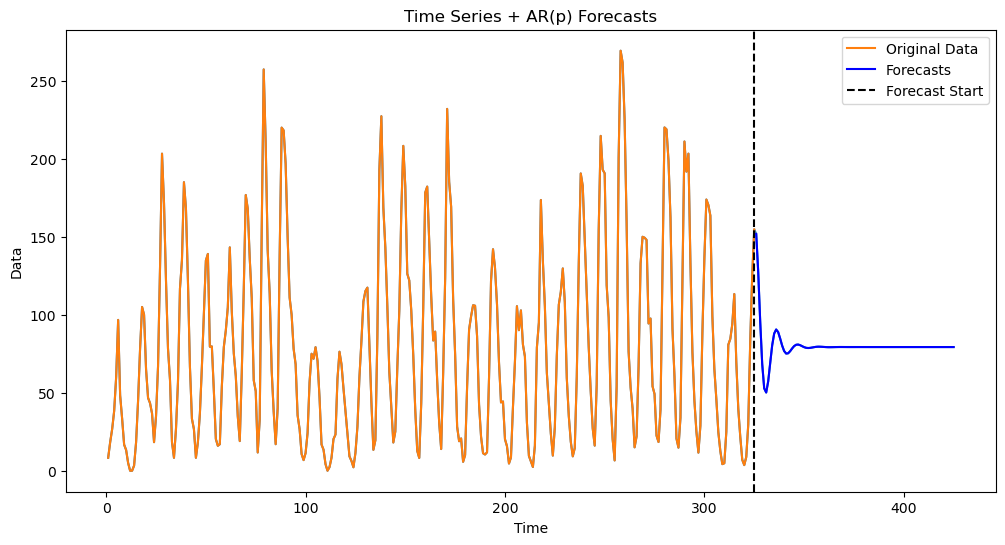

In [317]:
#Plotting the series with forecasts: 
plt.figure(figsize=(12, 6))
time_all = np.arange(1, n + k + 1)
plt.plot(time_all, yhat, color='C0')
plt.plot(range(1, n + 1), y, label='Original Data', color='C1')
plt.plot(range(n + 1, n + k + 1), predvalues, label='Forecasts', color='blue')
plt.axvline(x=n, color='black', linestyle='--', label='Forecast Start')
#plt.axhline(y=np.mean(y), color='gray', linestyle=':', label='Mean of Original Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Time Series + AR(p) Forecasts')
plt.legend()
plt.show()

The predictions above are quite different from those obtained from the Yule model. The predictions actually are given by a damped sinusoid (as we shall see in the coming lectures). The predictions become flat after a few time points. When the cycles become irregular with varying periods, constant predictors might do well compared to sinusoidal predictors which may go out of phase at some places. 